KNN is memory based and easy to implement
But is not effecient in large data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df =sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df['species']
X.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
X_train = df[['petal_length','petal_width']]
species_to_num = {'setosa':0,
                 'versicolor':1,
                 'virginica':2}
df['species'] = df['species'].map(species_to_num)
y_train = df['species']

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

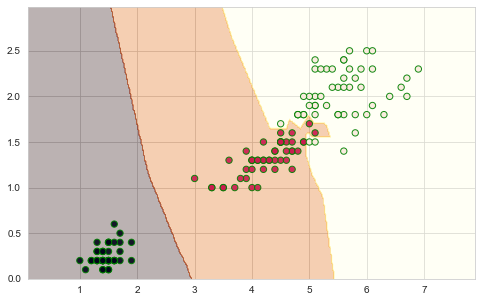

In [14]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3, 
                  );
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40, 
            alpha=0.9, edgecolors='g');

In [15]:
xx

array([[0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       ...,
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88]])

In [12]:
yy

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
       ...,
       [2.94, 2.94, 2.94, ..., 2.94, 2.94, 2.94],
       [2.96, 2.96, 2.96, ..., 2.96, 2.96, 2.96],
       [2.98, 2.98, 2.98, ..., 2.98, 2.98, 2.98]])